In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import davies_bouldin_score,silhouette_score, calinski_harabasz_score
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv("../data/preprocessed_data.csv")

In [3]:
data.columns

Index(['Category', 'PdDistrict', 'X', 'Y', 'Hour', 'Month', 'day', 'n_days'], dtype='object')

# XXXXX

In [4]:
sampled_data, _ = train_test_split(data,train_size=25000,stratify=data['Category'],
                                   random_state=42)

X = sampled_data.drop(columns=['Category'])
y = sampled_data['Category']

## Can't Use Grid Search

In [5]:
range_n_clusters = range(2, 15)
silhouette_scores = []

for k in range_n_clusters:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids.fit(X)

    score = silhouette_score(X, kmedoids.labels_)
    silhouette_scores.append(score)
    
best_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]

KeyboardInterrupt: 

In [13]:
kmedoids = KMedoids(n_clusters=best_k, random_state=0).fit(X)

clustered_df = X.copy()
clustered_df['Clusters'] = kmedoids.labels_


features = clustered_df.drop(columns=['Clusters'])


sil_score_train = silhouette_score(features, kmedoids.labels_)
calinski_score_train = calinski_harabasz_score(features, kmedoids.labels_)
davies_score_train = davies_bouldin_score(features, kmedoids.labels_)

print("silhouette_score:", sil_score_train)
print("calinski_harabasz_score:", calinski_score_train)
print("davies_bouldin_score:", davies_score_train)

silhouette_score: 0.239232248909592
calinski_harabasz_score: 10546.715021629485
davies_bouldin_score: 2.272673468023631


In [14]:
clustered_df

,X,Y,day,Month,Hour,n_days,PdDistrict,Clusters
622312,-0.871797,-0.055218,-0.066074,1.331962,0.241546,-0.918547,5,0
63599,-0.266478,1.280572,-0.179966,-0.126598,0.394109,1.447257,4,0
32716,1.905681,-1.337436,0.958949,1.331962,-0.368703,1.570342,0,0
81367,-1.939273,0.011803,-0.749423,-1.001734,0.546671,1.374010,5,0
391924,1.152978,0.220264,-0.863315,-0.126598,-2.046887,0.063870,7,1
...,...,...,...,...,...,...,...,...
781040,-2.791432,-0.091753,1.414515,-0.126598,-0.978952,-1.576260,8,1
788517,0.895060,0.673499,0.275600,-0.418310,-0.216140,-1.607220,7,2
219333,0.225471,0.165877,-0.749423,-1.001734,1.309482,0.822769,7,2
217473,-0.449263,0.022564,0.731166,-1.001734,-1.894325,0.832586,3,0


# PCA

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

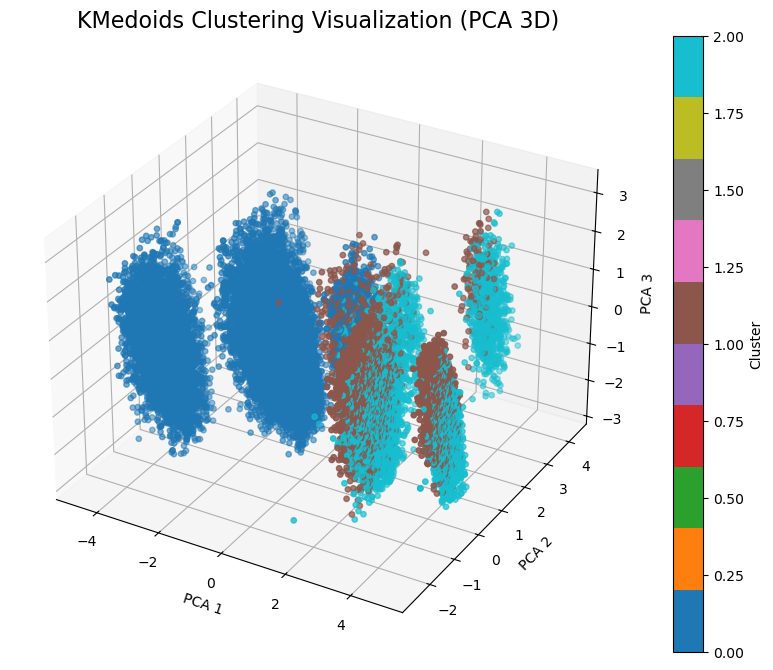

In [18]:
# Apply PCA (Principal Component Analysis) to reduce data to 3D
pca = PCA(n_components=3) # choose 3D
reduced_data_3d = pca.fit_transform(X) # Transform the original data (X) to 3D

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster labels as colors
sc = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2],
                c=kmedoids.labels_, cmap='tab10', s=15)

ax.set_title("KMedoids Clustering Visualization (PCA 3D)", fontsize=16)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

plt.colorbar(sc, label='Cluster')
plt.show()

# Dendo

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  

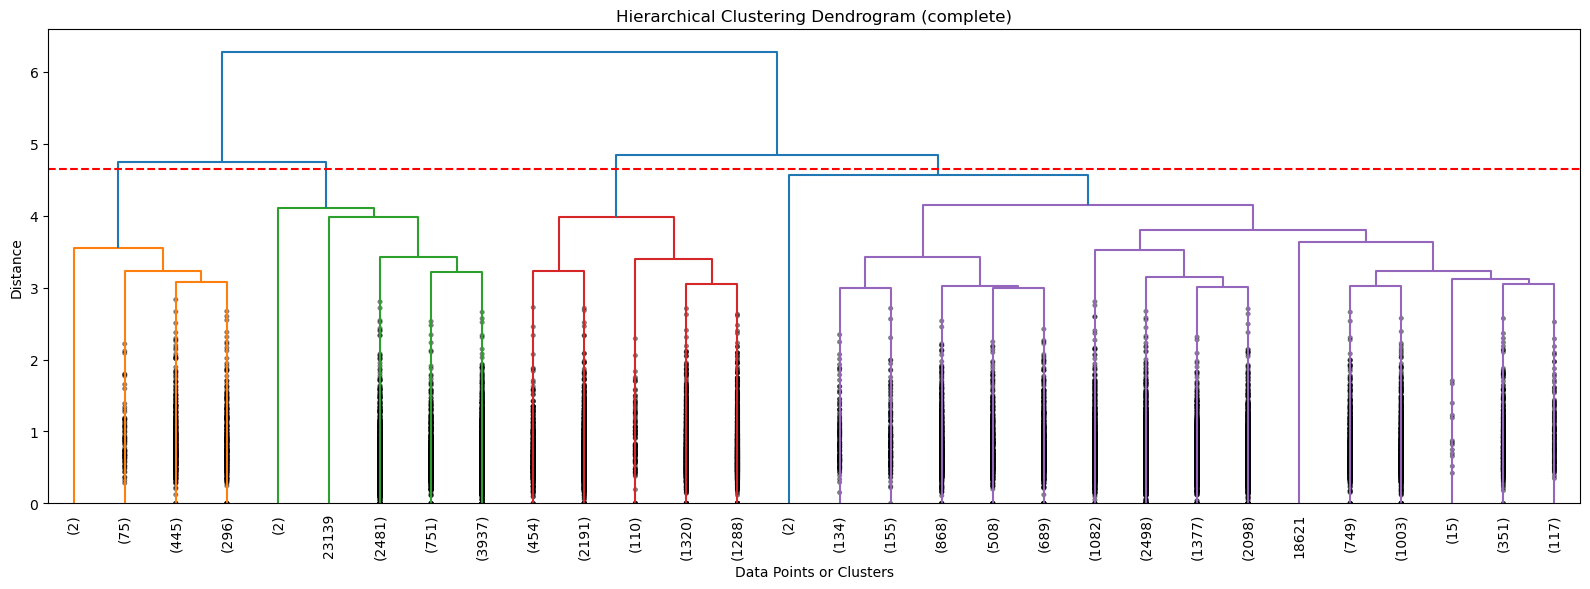

In [20]:
plt.figure(figsize=(16, 6))
linked=linkage(X,metric='euclidean', method='average')
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.axhline(y=4.65, color='red', linestyle='--') 
plt.title("Hierarchical Clustering Dendrogram (complete)")
plt.xlabel("Data Points or Clusters")
plt.ylabel("Distance")
plt.tight_layout()
plt.savefig('hierarchical_dendrogram_cut.png')
plt.show()

In [21]:
hierarchical_model = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='average')
hierarchical_labels = hierarchical_model.fit_predict(X)
hierar_df=X.copy()
hierar_df['Hierarchical_Cluster'] = hierarchical_labels
hierar_df.head()

,X,Y,day,Month,Hour,n_days,PdDistrict,Hierarchical_Cluster
622312,-0.871797,-0.055218,-0.066074,1.331962,0.241546,-0.918547,5,1
63599,-0.266478,1.280572,-0.179966,-0.126598,0.394109,1.447257,4,1
32716,1.905681,-1.337436,0.958949,1.331962,-0.368703,1.570342,0,0
81367,-1.939273,0.011803,-0.749423,-1.001734,0.546671,1.374010,5,1
391924,1.152978,0.220264,-0.863315,-0.126598,-2.046887,0.063870,7,2


In [ ]:
features = hierar_df.drop(columns=['Hierarchical_Cluster'])

sil_score = silhouette_score(features, hierarchical_labels)
calinski_score = calinski_harabasz_score(features, hierarchical_labels)
davies_score = davies_bouldin_score(features, hierarchical_labels)

print("silhouette_score:", sil_score)
print("calinski_harabasz_score:", calinski_score)
print("davies_bouldin_score:", davies_score)

In [28]:
clustered_df=pd.DataFrame(clustered_df)

In [31]:
clustered_df.columns

Index(['X', 'Y', 'day', 'Month', 'Hour', 'n_days', 'PdDistrict', 'Clusters'], dtype='object')

In [32]:
clustered_df.to_csv("../data/clustered_df.csv")

In [25]:
clustered_df.columns

Index(['X', 'Y', 'day', 'Month', 'Hour', 'n_days', 'PdDistrict', 'Clusters'], dtype='object')